In [ ]:
# In this notebook I will be taking Cherie's imputed dataset (metro_CA_2011_2018.csv) and adding all of the 
# possible lags in the dependent variable from 'year_avgs.csv'

In [62]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set(rc = {'figure.figsize':(15,8)})
pd.set_option('display.max_rows', 500)
from sklearn import ensemble
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
#sns.scatterplot(data=df, x="avg_rent", y="gini_index")

In [3]:
cherie = pd.read_csv('metro_CA_2011_2018.csv')

In [6]:
list(cherie.columns)

['Date',
 'Date.1',
 'aggregate_travel_time_to_work',
 'amerindian_including_hispanic',
 'amerindian_pop',
 'armed_forces',
 'asian_including_hispanic',
 'asian_male_45_54',
 'asian_male_55_64',
 'asian_pop',
 'associates_degree',
 'avg_rent',
 'bachelors_degree',
 'bachelors_degree_2',
 'bachelors_degree_or_higher_25_64',
 'black_including_hispanic',
 'black_male_45_54',
 'black_male_55_64',
 'black_pop',
 'children',
 'children_in_single_female_hh',
 'civilian_labor_force',
 'commute_10_14_mins',
 'commute_15_19_mins',
 'commute_20_24_mins',
 'commute_25_29_mins',
 'commute_30_34_mins',
 'commute_35_39_mins',
 'commute_35_44_mins',
 'commute_40_44_mins',
 'commute_45_59_mins',
 'commute_5_9_mins',
 'commute_60_89_mins',
 'commute_60_more_mins',
 'commute_90_more_mins',
 'commute_less_10_mins',
 'commuters_16_over',
 'commuters_by_bus',
 'commuters_by_car_truck_van',
 'commuters_by_carpool',
 'commuters_by_public_transportation',
 'commuters_by_subway_or_elevated',
 'commuters_drove_a

In [10]:
cherie['Date.1'].value_counts()

2012.0    764
2015.0    764
2014.0    764
2013.0    764
2016.0    764
2017.0    764
2011.0    764
2018.0    762
Name: Date.1, dtype: int64

In [14]:
# Aesthetic changes....
cherie = cherie.drop(columns='Date').rename(columns = {'Date.1':'year', 'Zipcode':'zipcode'})
cherie

,year,aggregate_travel_time_to_work,amerindian_including_hispanic,amerindian_pop,armed_forces,asian_including_hispanic,asian_male_45_54,asian_male_55_64,asian_pop,associates_degree,...,vacant_housing_units_for_rent,vacant_housing_units_for_sale,walked_to_work,white_including_hispanic,white_male_45_54,white_male_55_64,white_pop,worked_at_home,workers_16_and_over,zipcode
0,2011.0,797670.0,150.0,140.0,0.0,16199.0,1036.0,946.0,16104.0,2318.0,...,2017.0,278.0,7836.0,31988.0,2657.0,1716.0,28974.0,2703.0,31631.0,94109
1,2012.0,850510.0,187.0,160.0,0.0,15421.0,907.0,1002.0,15322.0,2318.0,...,1608.0,207.0,7720.0,32224.0,2614.0,1811.0,29226.0,2924.0,32836.0,94109
2,2013.0,902580.0,91.0,29.0,48.0,15639.0,880.0,1027.0,15509.0,2521.0,...,1099.0,193.0,8113.0,32779.0,2558.0,1942.0,29932.0,2829.0,33770.0,94109
3,2014.0,919860.0,85.0,16.0,74.0,15047.0,702.0,1016.0,14888.0,2353.0,...,858.0,161.0,8324.0,32432.0,2137.0,2017.0,29920.0,2585.0,34071.0,94109
4,2015.0,989955.0,96.0,13.0,55.0,15236.0,750.0,1009.0,15042.0,2336.0,...,674.0,113.0,8813.0,33489.0,2142.0,1892.0,31033.0,2648.0,35560.0,94109
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6105,2013.0,2417.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,25.0,...,0.0,51.0,0.0,264.0,24.0,40.0,264.0,25.0,60.0,92341
6106,2014.0,2055.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0,...,0.0,59.0,0.0,294.0,23.0,38.0,294.0,23.0,85.0,92341
6107,2015.0,1950.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0,...,0.0,49.0,0.0,287.0,23.0,35.0,287.0,22.0,83.0,92341
6108,2016.0,1950.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0,...,0.0,68.0,0.0,231.0,11.0,34.0,231.0,22.0,70.0,92341


In [18]:
targets = pd.read_csv('year_avgs.csv').drop(columns='Unnamed: 0')
targets

,geo_id,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,10025,3033.75,2864.666667,2967.000000,3144.666667,3274.375000,3849.875000,4166.714286,4219.333333,3532.000000,3804.333333,NaN
1,60657,1783.75,1787.250000,1866.833333,1955.666667,2005.666667,2073.500000,2140.416667,2127.416667,2098.333333,2085.545455,1996.0
2,10023,3303.75,3074.250000,3073.833333,3198.250000,3322.250000,4153.600000,4670.375000,4032.333333,3835.125000,3960.222222,NaN
3,77494,1554.00,1584.500000,1630.583333,1786.833333,1956.833333,1921.916667,1819.833333,1770.083333,1788.166667,1763.416667,1778.0
4,60614,1919.00,1897.583333,2014.666667,2148.000000,2202.583333,2271.000000,2346.500000,2344.000000,2314.250000,2306.583333,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
13176,26291,946.00,957.272727,949.545455,979.272727,949.363636,1036.333333,1021.583333,949.666667,918.416667,952.250000,923.0
13177,12720,1399.00,1200.125000,1152.181818,1200.166667,1209.750000,1134.363636,1196.500000,1181.416667,1261.250000,1295.181818,1272.0
13178,26209,NaN,NaN,NaN,NaN,692.200000,769.000000,732.666667,762.666667,766.727273,739.888889,765.0
13179,41101,758.25,782.333333,846.083333,832.750000,836.166667,846.916667,865.083333,851.666667,855.916667,846.000000,815.0


In [44]:
merged = pd.merge(cherie, targets, left_on='zipcode', right_on='geo_id')

In [46]:
for i in range(merged.shape[0]):
    year = int(merged.loc[i, 'year'])
    if (year+1) in range(2010, 2021):
        merged.loc[i, 'rent_in_1y'] = merged.loc[i, str(year+1)]
    if (year+2) in range(2010, 2021):
        merged.loc[i, 'rent_in_2y'] = merged.loc[i, str(year+2)]
    if (year+3) in range(2010, 2021):
        merged.loc[i, 'rent_in_3y'] = merged.loc[i, str(year+3)]
    if (year+4) in range(2010, 2021):
        merged.loc[i, 'rent_in_4y'] = merged.loc[i, str(year+4)]
    if (year+5) in range(2010, 2021):
        merged.loc[i, 'rent_in_5y'] = merged.loc[i, str(year+5)]

In [52]:
merged.year = merged.year.astype(int)

In [53]:
merged = merged.drop(columns=['geo_id', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020'])

In [54]:
merged.zipcode

,year,aggregate_travel_time_to_work,amerindian_including_hispanic,amerindian_pop,armed_forces,asian_including_hispanic,asian_male_45_54,asian_male_55_64,asian_pop,associates_degree,avg_rent,bachelors_degree,bachelors_degree_2,bachelors_degree_or_higher_25_64,black_including_hispanic,black_male_45_54,black_male_55_64,black_pop,children,children_in_single_female_hh,civilian_labor_force,commute_10_14_mins,commute_15_19_mins,commute_20_24_mins,commute_25_29_mins,...,total_pop,two_cars,two_or_more_races_pop,two_parent_families_with_young_children,two_parents_father_in_labor_force_families_with_young_children,two_parents_in_labor_force_families_with_young_children,two_parents_mother_in_labor_force_families_with_young_children,two_parents_not_in_labor_force_families_with_young_children,unemployed_pop,vacant_housing_units,vacant_housing_units_for_rent,vacant_housing_units_for_sale,walked_to_work,white_including_hispanic,white_male_45_54,white_male_55_64,white_pop,worked_at_home,workers_16_and_over,zipcode,rent_in_1y,rent_in_2y,rent_in_3y,rent_in_4y,rent_in_5y
0,2011,797670.0,150.0,140.0,0.0,16199.0,1036.0,946.0,16104.0,2318.0,3135.416667,17652.0,16512.0,22561.0,2027.0,376.0,191.0,1679.0,3465.0,428.0,34934.0,2915.0,5160.0,4770.0,2015.0,...,53809.0,2211.0,1306.0,1346.0,543.0,730.0,28.0,45.0,2457.0,4408.0,2017.0,278.0,7836.0,31988.0,2657.0,1716.0,28974.0,2703.0,31631.0,94109,3375.500000,3747.083333,4123.250000,4520.250000,4492.916667
1,2012,850510.0,187.0,160.0,0.0,15421.0,907.0,1002.0,15322.0,2318.0,3375.500000,17652.0,17652.0,23831.0,2448.0,522.0,238.0,2132.0,3270.0,420.0,36020.0,2873.0,5125.0,5080.0,1898.0,...,54412.0,2464.0,1685.0,1256.0,508.0,671.0,34.0,43.0,2477.0,3831.0,1608.0,207.0,7720.0,32224.0,2614.0,1811.0,29226.0,2924.0,32836.0,94109,3747.083333,4123.250000,4520.250000,4492.916667,4231.416667
2,2013,902580.0,91.0,29.0,48.0,15639.0,880.0,1027.0,15509.0,2521.0,3747.083333,17866.0,17866.0,24554.0,2178.0,445.0,218.0,1865.0,3406.0,701.0,36924.0,2838.0,4920.0,5338.0,2447.0,...,55519.0,2620.0,1609.0,1358.0,653.0,625.0,38.0,42.0,2470.0,3485.0,1099.0,193.0,8113.0,32779.0,2558.0,1942.0,29932.0,2829.0,33770.0,94109,4123.250000,4520.250000,4492.916667,4231.416667,4245.916667
3,2014,919860.0,85.0,16.0,74.0,15047.0,702.0,1016.0,14888.0,2353.0,4123.250000,18818.0,18818.0,25778.0,2279.0,409.0,285.0,2221.0,2797.0,577.0,37014.0,2929.0,4938.0,5534.0,2316.0,...,54768.0,2322.0,1823.0,1116.0,425.0,625.0,38.0,28.0,2155.0,3399.0,858.0,161.0,8324.0,32432.0,2137.0,2017.0,29920.0,2585.0,34071.0,94109,4520.250000,4492.916667,4231.416667,4245.916667,4421.083333
4,2015,989955.0,96.0,13.0,55.0,15236.0,750.0,1009.0,15042.0,2336.0,4520.250000,19424.0,19424.0,27340.0,2411.0,401.0,251.0,2342.0,2914.0,669.0,38089.0,2908.0,4741.0,5912.0,2484.0,...,56293.0,2508.0,1802.0,1102.0,448.0,581.0,73.0,0.0,1673.0,3329.0,674.0,113.0,8813.0,33489.0,2142.0,1892.0,31033.0,2648.0,35560.0,94109,4492.916667,4231.416667,4245.916667,4421.083333,4406.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6105,2013,2417.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,25.0,1129.454545,81.0,81.0,77.0,0.0,0.0,0.0,0.0,61.0,25.0,94.0,0.0,0.0,0.0,0.0,...,326.0,42.0,0.0,36.0,0.0,36.0,0.0,0.0,34.0,1020.0,0.0,51.0,0.0,264.0,24.0,40.0,264.0,25.0,60.0,92341,1186.333333,1238.666667,1308.666667,1414.833333,1456.000000
6106,2014,2055.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0,1186.333333,91.0,91.0,75.0,0.0,0.0,0.0,0.0,37.0,26.0,95.0,0.0,0.0,0.0,0.0,...,294.0,34.0,0.0,11.0,0.0,11.0,0.0,0.0,10.0,914.0,0.0,59.0,0.0,294.0,23.0,38.0,294.0,23.0,85.0,92341,1238.666667,1308.666667,1414.833333,1456.000000,1332.454545
6107,2015,1950.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0,1238.666667,85.0,85.0,70.0,0.0,0.0,0.0,0.0,35.0,25.0,94.0,0.0,0.0,0.0,0.0,...,287.0,32.0,0.0,10.0,0.0,10.0,0.0,0.0,11.0,932.0,0.0,49.0,0.0,287.0,23.0,35.0,287.0,22.0,83.0,92341,1308.666667,1414.833333,1456.0000

In [55]:
merged.to_csv('metro_CA_2011_2018_lagged.csv', index=False)

# 1 year forecast 🌪

In [57]:
fcst_1y = merged.drop(columns=['zipcode', 'rent_in_2y', 'rent_in_3y', 'rent_in_4y', 'rent_in_5y'])

In [60]:
fcst_1y = fcst_1y.dropna()

In [61]:
X = fcst_1y.drop(columns = 'rent_in_1y')
y = fcst_1y.rent_in_1y

In [66]:
mlr = LinearRegression()
mlr_test = []
mlr_train = []
for i in range(100):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)
    mlr.fit(X_train, y_train)
    mlr_test.append(mlr.score(X_test, y_test))
    mlr_train.append(mlr.score(X_train, y_train))

<AxesSubplot:xlabel='score', ylabel='Density'>

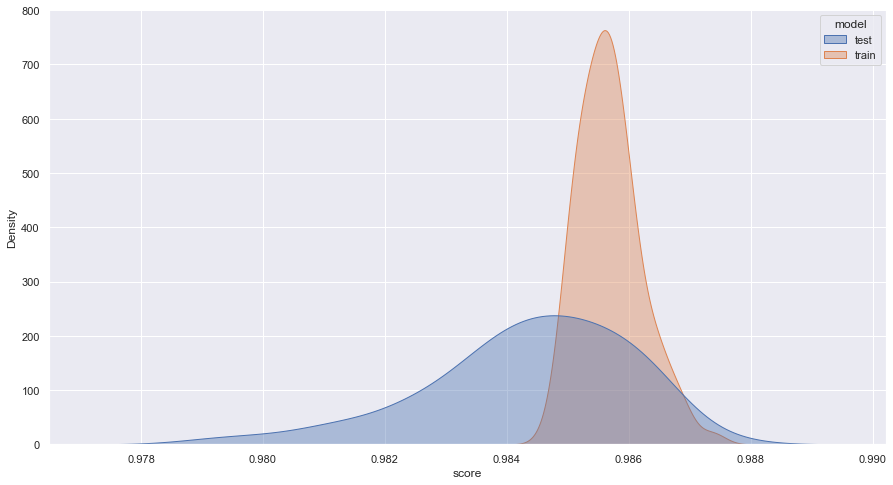

In [67]:
scores = pd.concat([pd.DataFrame({'score':mlr_test,'model':'test'}),
                    pd.DataFrame({'score':mlr_train,'model':'train'})#,
                    #pd.DataFrame({'score':mlr_nodate,'model':'nodate'})
                   ])
sns.kdeplot(data=scores, x="score", hue="model", fill=True, common_norm=False, alpha=0.4)

# 2 year forecast 🌪

In [57]:
fcst_2y = merged.drop(columns=['zipcode', 'rent_in_1y', 'rent_in_3y', 'rent_in_4y', 'rent_in_5y'])

In [60]:
fcst_2y = fcst_2y.dropna()

In [61]:
X = fcst_2y.drop(columns = 'rent_in_2y')
y = fcst_2y.rent_in_2y

In [68]:
mlr = LinearRegression()
mlr_test = []
mlr_train = []
for i in range(100):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)
    mlr.fit(X_train, y_train)
    mlr_test.append(mlr.score(X_test, y_test))
    mlr_train.append(mlr.score(X_train, y_train))

<AxesSubplot:xlabel='score', ylabel='Density'>

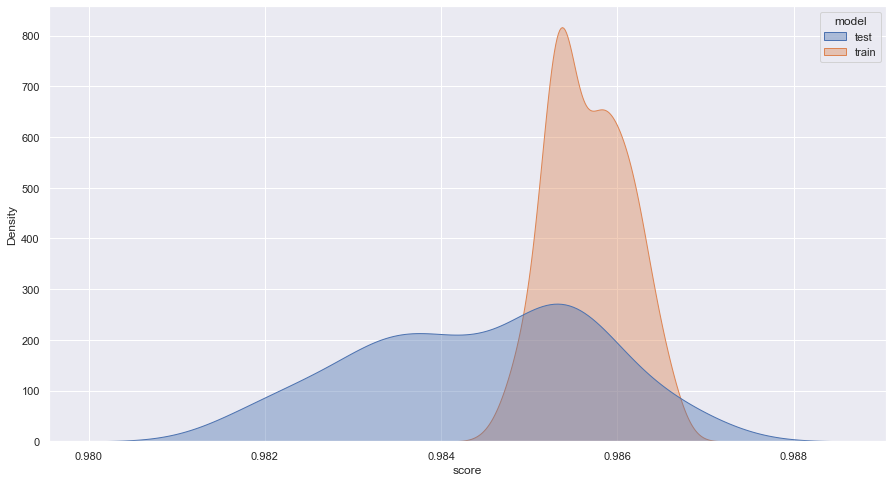

In [69]:
scores = pd.concat([pd.DataFrame({'score':mlr_test,'model':'test'}),
                    pd.DataFrame({'score':mlr_train,'model':'train'})#,
                    #pd.DataFrame({'score':mlr_nodate,'model':'nodate'})
                   ])
sns.kdeplot(data=scores, x="score", hue="model", fill=True, common_norm=False, alpha=0.4)

# 3 year forecast 🌪

In [70]:
fcst_3y = merged.drop(columns=['zipcode', 'rent_in_1y', 'rent_in_2y', 'rent_in_4y', 'rent_in_5y'])

In [71]:
fcst_3y = fcst_3y.dropna()

In [72]:
X = fcst_3y.drop(columns = 'rent_in_3y')
y = fcst_3y.rent_in_3y

In [73]:
mlr = LinearRegression()
mlr_test = []
mlr_train = []
for i in range(100):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)
    mlr.fit(X_train, y_train)
    mlr_test.append(mlr.score(X_test, y_test))
    mlr_train.append(mlr.score(X_train, y_train))

<AxesSubplot:xlabel='score', ylabel='Density'>

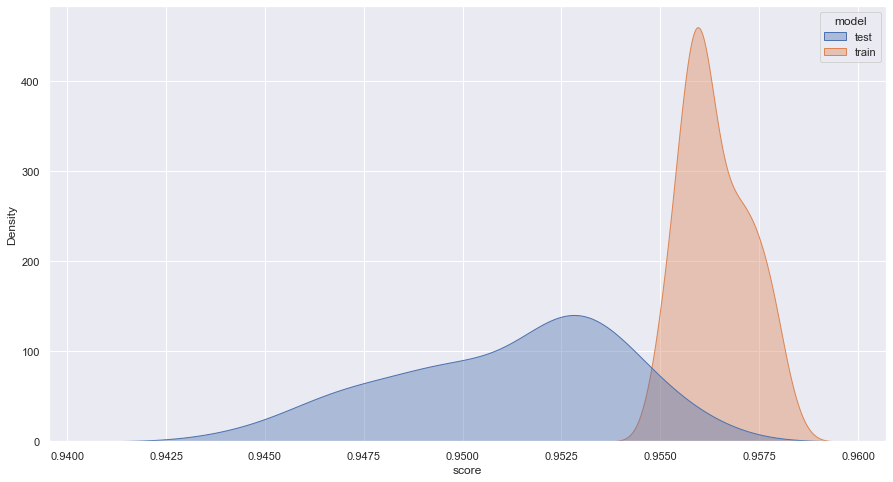

In [74]:
scores = pd.concat([pd.DataFrame({'score':mlr_test,'model':'test'}),
                    pd.DataFrame({'score':mlr_train,'model':'train'})#,
                    #pd.DataFrame({'score':mlr_nodate,'model':'nodate'})
                   ])
sns.kdeplot(data=scores, x="score", hue="model", fill=True, common_norm=False, alpha=0.4)

# 4 year forecast 🌪

In [76]:
fcst_4y = merged.drop(columns=['zipcode', 'rent_in_1y', 'rent_in_2y', 'rent_in_3y', 'rent_in_5y'])

In [77]:
fcst_4y = fcst_4y.dropna()

In [78]:
X = fcst_4y.drop(columns = 'rent_in_4y')
y = fcst_4y.rent_in_4y

In [79]:
mlr = LinearRegression()
mlr_test = []
mlr_train = []
for i in range(100):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)
    mlr.fit(X_train, y_train)
    mlr_test.append(mlr.score(X_test, y_test))
    mlr_train.append(mlr.score(X_train, y_train))

<AxesSubplot:xlabel='score', ylabel='Density'>

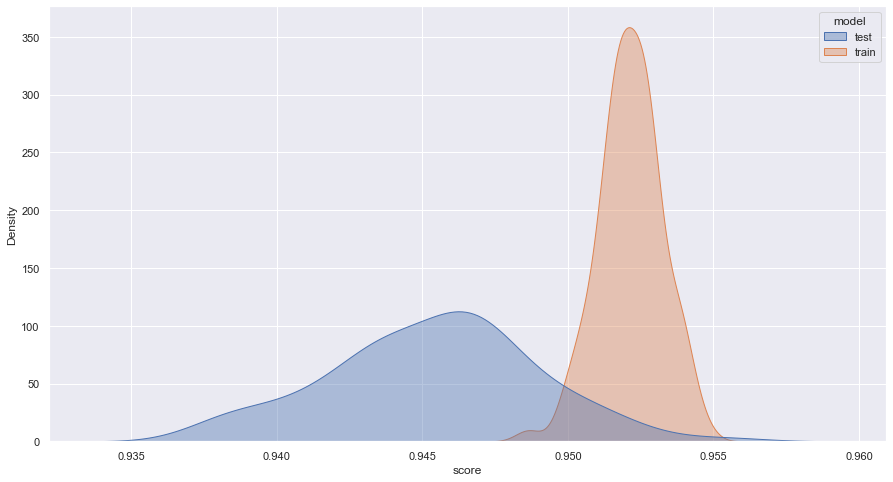

In [80]:
scores = pd.concat([pd.DataFrame({'score':mlr_test,'model':'test'}),
                    pd.DataFrame({'score':mlr_train,'model':'train'})#,
                    #pd.DataFrame({'score':mlr_nodate,'model':'nodate'})
                   ])
sns.kdeplot(data=scores, x="score", hue="model", fill=True, common_norm=False, alpha=0.4)

# 5 year forecast 🌪

In [81]:
fcst_5y = merged.drop(columns=['zipcode', 'rent_in_1y', 'rent_in_2y', 'rent_in_3y', 'rent_in_4y'])

In [82]:
fcst_5y = fcst_5y.dropna()

In [83]:
X = fcst_5y.drop(columns = 'rent_in_5y')
y = fcst_5y.rent_in_5y

In [84]:
mlr = LinearRegression()
mlr_test = []
mlr_train = []
for i in range(100):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)
    mlr.fit(X_train, y_train)
    mlr_test.append(mlr.score(X_test, y_test))
    mlr_train.append(mlr.score(X_train, y_train))

<AxesSubplot:xlabel='score', ylabel='Density'>

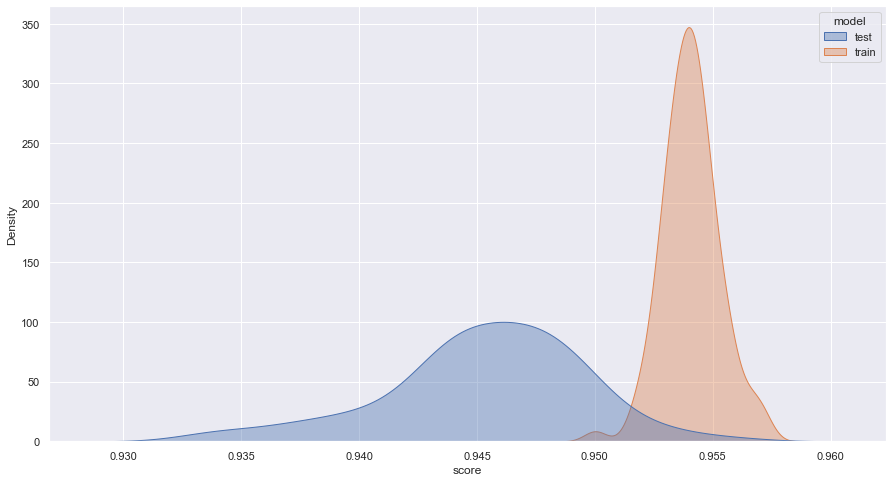

In [85]:
scores = pd.concat([pd.DataFrame({'score':mlr_test,'model':'test'}),
                    pd.DataFrame({'score':mlr_train,'model':'train'})#,
                    #pd.DataFrame({'score':mlr_nodate,'model':'nodate'})
                   ])
sns.kdeplot(data=scores, x="score", hue="model", fill=True, common_norm=False, alpha=0.4)

In [86]:
fcst_5y

,year,aggregate_travel_time_to_work,amerindian_including_hispanic,amerindian_pop,armed_forces,asian_including_hispanic,asian_male_45_54,asian_male_55_64,asian_pop,associates_degree,avg_rent,bachelors_degree,bachelors_degree_2,bachelors_degree_or_higher_25_64,black_including_hispanic,black_male_45_54,black_male_55_64,black_pop,children,children_in_single_female_hh,civilian_labor_force,commute_10_14_mins,commute_15_19_mins,commute_20_24_mins,commute_25_29_mins,...,some_college_and_associates_degree,speak_only_english_at_home,speak_spanish_at_home,speak_spanish_at_home_low_english,three_cars,total_pop,two_cars,two_or_more_races_pop,two_parent_families_with_young_children,two_parents_father_in_labor_force_families_with_young_children,two_parents_in_labor_force_families_with_young_children,two_parents_mother_in_labor_force_families_with_young_children,two_parents_not_in_labor_force_families_with_young_children,unemployed_pop,vacant_housing_units,vacant_housing_units_for_rent,vacant_housing_units_for_sale,walked_to_work,white_including_hispanic,white_male_45_54,white_male_55_64,white_pop,worked_at_home,workers_16_and_over,rent_in_5y
0,2011,797670.0,150.0,140.0,0.0,16199.0,1036.0,946.0,16104.0,2318.0,3135.416667,17652.0,16512.0,22561.0,2027.0,376.0,191.0,1679.0,3465.0,428.0,34934.0,2915.0,5160.0,4770.0,2015.0,...,8575.0,33194.0,3604.0,1242.0,600.0,53809.0,2211.0,1306.0,1346.0,543.0,730.0,28.0,45.0,2457.0,4408.0,2017.0,278.0,7836.0,31988.0,2657.0,1716.0,28974.0,2703.0,31631.0,4492.916667
1,2012,850510.0,187.0,160.0,0.0,15421.0,907.0,1002.0,15322.0,2318.0,3375.500000,17652.0,17652.0,23831.0,2448.0,522.0,238.0,2132.0,3270.0,420.0,36020.0,2873.0,5125.0,5080.0,1898.0,...,8597.0,34175.0,3648.0,1093.0,584.0,54412.0,2464.0,1685.0,1256.0,508.0,671.0,34.0,43.0,2477.0,3831.0,1608.0,207.0,7720.0,32224.0,2614.0,1811.0,29226.0,2924.0,32836.0,4231.416667
2,2013,902580.0,91.0,29.0,48.0,15639.0,880.0,1027.0,15509.0,2521.0,3747.083333,17866.0,17866.0,24554.0,2178.0,445.0,218.0,1865.0,3406.0,701.0,36924.0,2838.0,4920.0,5338.0,2447.0,...,9185.0,34026.0,4015.0,1224.0,447.0,55519.0,2620.0,1609.0,1358.0,653.0,625.0,38.0,42.0,2470.0,3485.0,1099.0,193.0,8113.0,32779.0,2558.0,1942.0,29932.0,2829.0,33770.0,4245.916667
3,2014,919860.0,85.0,16.0,74.0,15047.0,702.0,1016.0,14888.0,2353.0,4123.250000,18818.0,18818.0,25778.0,2279.0,409.0,285.0,2221.0,2797.0,577.0,37014.0,2929.0,4938.0,5534.0,2316.0,...,9149.0,34737.0,3419.0,1353.0,370.0,54768.0,2322.0,1823.0,1116.0,425.0,625.0,38.0,28.0,2155.0,3399.0,858.0,161.0,8324.0,32432.0,2137.0,2017.0,29920.0,2585.0,34071.0,4421.083333
4,2015,989955.0,96.0,13.0,55.0,15236.0,750.0,1009.0,15042.0,2336.0,4520.250000,19424.0,19424.0,27340.0,2411.0,401.0,251.0,2342.0,2914.0,669.0,38089.0,2908.0,4741.0,5912.0,2484.0,...,8912.0,35967.0,3521.0,1388.0,336.0,56293.0,2508.0,1802.0,1102.0,448.0,581.0,73.0,0.0,1673.0,3329.0,674.0,113.0,8813.0,33489.0,2142.0,1892.0,31033.0,2648.0,35560.0,4406.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6103,2011,2780.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,28.0,1175.833333,56.0,13.0,13.0,0.0,0.0,0.0,0.0,40.0,0.0,120.0,0.0,0.0,0.0,0.0,...,121.0,141.0,52.0,19.0,33.0,233.0,14.0,0.0,40.0,0.0,40.0,0.0,0.0,38.0,987.0,0.0,25.0,25.0,126.0,13.0,0.0,126.0,0.0,82.0,1308.666667
6104,2012,2780.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,28.0,1172.916667,56.0,56.0,40.0,0.0,0.0,0.0,0.0,41.0,0.0,117.0,0.0,0.0,0.0,0.0,...,125.0,180.0,42.0,14.0,28.0,263.0,31.0,0.0,41.0,0.0,41.0,0.0,0.0,39.0,980.0,0.0,37.0,0.0,175.0,23.0,27.0,175.0,0.0,78.0,1414.833333
6105,2013,2417.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,25.0,1129.454545,81.0,81.0,77.0,0.0,0.0,0.0,0.0,61.0,25.0,94.0,0.0,0.0,0.0,0.0,...,124.0,253.0,37.0,11.0,11.0,326.0,42.0,0.0,36.0,0.0,36.0,0.0,0.0,34.0,1020.0,0.0,51.0,0.0,264.0,24.0,40.0,264.0,25.0,60.0,1456.000000
6106,2014,2055.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0,1186.333333,91.0,91.0,75

# Testing with 2018...

In [88]:
merged[merged.year == 2018]

,year,aggregate_travel_time_to_work,amerindian_including_hispanic,amerindian_pop,armed_forces,asian_including_hispanic,asian_male_45_54,asian_male_55_64,asian_pop,associates_degree,avg_rent,bachelors_degree,bachelors_degree_2,bachelors_degree_or_higher_25_64,black_including_hispanic,black_male_45_54,black_male_55_64,black_pop,children,children_in_single_female_hh,civilian_labor_force,commute_10_14_mins,commute_15_19_mins,commute_20_24_mins,commute_25_29_mins,...,total_pop,two_cars,two_or_more_races_pop,two_parent_families_with_young_children,two_parents_father_in_labor_force_families_with_young_children,two_parents_in_labor_force_families_with_young_children,two_parents_mother_in_labor_force_families_with_young_children,two_parents_not_in_labor_force_families_with_young_children,unemployed_pop,vacant_housing_units,vacant_housing_units_for_rent,vacant_housing_units_for_sale,walked_to_work,white_including_hispanic,white_male_45_54,white_male_55_64,white_pop,worked_at_home,workers_16_and_over,zipcode,rent_in_1y,rent_in_2y,rent_in_3y,rent_in_4y,rent_in_5y
7,2018,1060055.0,191.0,22.0,10.0,14606.0,747.0,910.0,15094.0,1760.0,4245.916667,20140.0,20140.0,28520.0,2349.0,226.0,425.0,2515.0,2845.0,278.0,39550.0,3282.0,4657.0,5674.0,2681.0,...,56677.0,2416.0,2132.0,1234.0,389.0,814.0,31.0,0.0,1558.0,4327.0,1293.0,33.0,10948.0,34621.0,1989.0,1759.0,30670.0,2443.0,37140.0,94109,4421.083333,4406.0,NaN,NaN,NaN
15,2018,1349495.0,435.0,162.0,22.0,7358.0,553.0,409.0,7666.0,4431.0,2669.583333,9905.0,9905.0,12244.0,21605.0,1466.0,1074.0,21397.0,24920.0,7526.0,52223.0,5413.0,6701.0,6573.0,3604.0,...,96836.0,11103.0,3803.0,5195.0,1897.0,2994.0,208.0,96.0,3732.0,1489.0,538.0,65.0,839.0,32811.0,733.0,900.0,10865.0,1008.0,46843.0,90250,2606.666667,2585.0,NaN,NaN,NaN
23,2018,1761025.0,763.0,306.0,53.0,13945.0,906.0,809.0,12907.0,4997.0,2177.000000,8135.0,8135.0,9479.0,14030.0,1012.0,727.0,14406.0,24960.0,7147.0,49487.0,2954.0,5108.0,3989.0,1789.0,...,96081.0,9782.0,5090.0,4511.0,1887.0,2426.0,102.0,96.0,4596.0,1422.0,440.0,84.0,587.0,33110.0,1577.0,1351.0,17455.0,1299.0,43349.0,94565,2270.666667,2283.0,NaN,NaN,NaN
31,2018,849580.0,115.0,34.0,86.0,3344.0,251.0,126.0,3253.0,2818.0,3185.500000,18837.0,18837.0,23677.0,2680.0,107.0,265.0,2300.0,3876.0,545.0,36500.0,3147.0,2883.0,3532.0,1947.0,...,50587.0,8149.0,2131.0,1295.0,432.0,854.0,9.0,0.0,2514.0,2783.0,707.0,90.0,1180.0,40771.0,3229.0,2572.0,36967.0,4656.0,33109.0,90046,3182.333333,3212.0,NaN,NaN,NaN
39,2018,1025560.0,294.0,135.0,709.0,18175.0,1285.0,978.0,17733.0,3323.0,3198.833333,14847.0,14847.0,20484.0,5412.0,203.0,276.0,4977.0,12484.0,2411.0,34735.0,3274.0,3873.0,3519.0,1600.0,...,63843.0,8701.0,4111.0,3614.0,964.0,2536.0,78.0,36.0,1492.0,1542.0,445.0,24.0,1139.0,31623.0,2489.0,2097.0,28259.0,2409.0,33165.0,94501,3251.083333,3282.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6063,2018,7230.0,0.0,0.0,0.0,44.0,32.0,0.0,49.0,67.0,1454.000000,145.0,145.0,168.0,1.0,1.0,0.0,1.0,693.0,18.0,1036.0,225.0,137.0,35.0,0.0,...,2479.0,352.0,152.0,36.0,22.0,14.0,0.0,0.0,116.0,898.0,7.0,35.0,18.0,2276.0,100.0,135.0,1411.0,167.0,920.0,92391,1503.750000,1518.0,NaN,NaN,NaN
6071,2018,7230.0,0.0,0.0,0.0,186.0,30.0,7.0,235.0,31.0,3763.166667,491.0,491.0,455.0,0.0,0.0,0.0,0.0,116.0,25.0,616.0,41.0,16.0,130.0,0.0,...,1343.0,246.0,11.0,0.0,0.0,0.0,0.0,0.0,15.0,81.0,0.0,0.0,0.0,1254.0,83.0,104.0,1020.0,190.0,601.0,92091,3757.000000,3690.0,NaN,NaN,NaN
6079,2018,7230.0,6.0,4.0,0.0,5.0,0.0,7.0,38.0,78.0,1170.500000,58.0,58.0,91.0,101.0,0.0,20.0,89.0,498.0,109.0,675.0,70.0,2.0,12.0,40.0,...,1723.0,199.0,26.0,69.0,15.0,45.0,9.0,0.0,103.0,308.0,11.0,9.0,16.0,1414.0,112.0,100.0,1273.0,25.0,565.0,93562,1216.727273,1274.0,NaN,NaN,NaN
6087,2018,7230.0,39.0,37.0,0.0,8.0,0.0,0.0,13.0,64.0,2112.500000,185.0,185.0,213.0,0.0,0.0,0.0,0.0,185.0,0.0,472.0,49.0,36.0,63.